In [186]:
categories = ["Angelina Jolie","Brad Pitt","Denzel Washington","Jennifer Lawrence","Johnny Depp","Kate Winslet","Megan Fox","Natalie Portman","Nicole Kidman","Patryk Walat"]

In [187]:
import cv2
import matplotlib.pyplot as plt
import os


training_data = []
DATADIR = "C:\FaceDetection\Celebrity Faces Dataset_10_model_copy"
img_size = 50
for category in categories:
    path = os.path.join(DATADIR,category)
    category_index = categories.index(category)
    try:
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array,(img_size,img_size))
            training_data.append([new_array, category_index]) 
    except Exception as e:
        pass

In [188]:
print(len(training_data))
import random
random.shuffle(training_data)

1008


In [189]:
X = []
y = []
for features, labels in training_data:
    X.append(features)
    y.append(labels)


In [190]:
import numpy as np
X = np.array(X).reshape(-1,img_size,img_size,1)

In [191]:
X = X/255.0

In [192]:
y = np.array(y)

In [193]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.2, random_state = 42)

In [111]:
#y_train = y_train.reshape(-1,)
#y_test = y_test.reshape(-1,)

AttributeError: 'list' object has no attribute 'reshape'

In [39]:
"""
import numpy as np
img_size = 50
X = np.array(X).reshape(-1,img_size, img_size, 1)
y = np.array(y)
"""


In [40]:
# X = X/255.0
# y = y.reshape(-1,)

In [166]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [194]:
# BUILDING MODEL
model = Sequential()

# FIRST MODEL
"""
model.add(Flatten(input_shape = (32,32,3)))
model.add(Dense(3000, activation = "relu"))
model.add(Dense(1000, activation = "relu"))
model.add(Dense(10, activation = "sigmoid"))
"""

# SECOND MODEL
model.add(Conv2D(64, kernel_size = (3,3), activation = "relu", input_shape = X.shape[1:]))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, kernel_size = (3,3), activation = "relu"))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dense(10, activation = "softmax"))

In [195]:
# SPARSE_CATEGORICAL_CROSSENTROPY BO DANE SA W POSTACI LICZB A NIE W POSTACI ONE HOT ENCODING
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "adam",
             metrics = ["accuracy"])
model.fit(X, y, batch_size = 32, validation_split = 0.1, epochs =20)

Epoch 1/20
29/29 [==============================] - 4s 102ms/step - loss: 2.2039 - accuracy: 0.2293 - val_loss: 2.1066 - val_accuracy: 0.2277
Epoch 2/20
29/29 [==============================] - 3s 91ms/step - loss: 1.8120 - accuracy: 0.3451 - val_loss: 1.8747 - val_accuracy: 0.3069
Epoch 3/20
29/29 [==============================] - 3s 95ms/step - loss: 1.5641 - accuracy: 0.4267 - val_loss: 1.7746 - val_accuracy: 0.4059
Epoch 4/20
29/29 [==============================] - 3s 90ms/step - loss: 1.4274 - accuracy: 0.4873 - val_loss: 1.7262 - val_accuracy: 0.3762
Epoch 5/20
29/29 [==============================] - 3s 93ms/step - loss: 1.2339 - accuracy: 0.5755 - val_loss: 1.8911 - val_accuracy: 0.3168
Epoch 6/20
29/29 [==============================] - 3s 90ms/step - loss: 1.1378 - accuracy: 0.6009 - val_loss: 1.7973 - val_accuracy: 0.3960
Epoch 7/20
29/29 [==============================] - 3s 90ms/step - loss: 0.9680 - accuracy: 0.6803 - val_loss: 1.9394 - val_accuracy: 0.4059
Epoch 8/20
2

In [196]:
from keras.models import load_model

model.save("model_basic_new12.h5")

In [197]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(X_test)
y_pred_classed = [np.argmax(single_pred) for single_pred in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classed))

7/7 [==============================] - 0s 24ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        20
           1       0.87      1.00      0.93        20
           2       1.00      0.88      0.94        26
           3       1.00      0.94      0.97        18
           4       1.00      0.91      0.95        23
           5       0.79      0.90      0.84        21
           6       0.95      0.90      0.92        20
           7       0.89      0.94      0.92        18
           8       0.93      0.81      0.87        16
           9       1.00      1.00      1.00        20

    accuracy                           0.93       202
   macro avg       0.93      0.93      0.93       202
weighted avg       0.94      0.93      0.93       202



<class 'numpy.ndarray'>


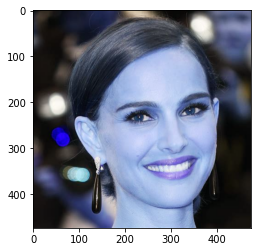

(474, 474, 3)
1/1 [==============================] - 0s 35ms/step
[[1.29661948e-10 1.01584965e-05 1.83713017e-03 4.44902387e-03
  9.93702650e-01 2.87130375e-10 1.80533661e-07 3.61017214e-07
  5.55184158e-07 6.68556167e-33]
 [1.16215522e-12 9.73366696e-07 4.16298658e-02 4.02738750e-01
  5.55628419e-01 5.30696038e-13 2.02850197e-06 1.00624140e-08
  1.25210375e-08 0.00000000e+00]
 [1.41235472e-12 1.04923594e-04 2.13829204e-01 4.03013837e-04
  7.85597980e-01 9.61593001e-13 6.48737623e-05 2.14772020e-10
  1.66159815e-08 0.00000000e+00]]


In [198]:
import cv2
import os

bird_predict = cv2.imread(r"C:\FaceDetection\Celebrity Faces Dataset_10_model\Natalie Portman\\030_ff4d2ab8.jpg")
print(type(bird_predict))
plt.imshow(bird_predict)
plt.show()
print(bird_predict.shape)

img_size = 50
new_image = cv2.resize(bird_predict, (img_size, img_size))
X = np.array(new_image).reshape(-1, img_size, img_size, 1)
X = X/255.0

prediction1 = model.predict(X)
print(prediction1)

In [199]:
y_pred = model.predict(X_test)

7/7 [==============================] - 0s 19ms/step


In [200]:
y_categories = [np.argmax(element) for element in y_pred]

In [201]:
y_categories[:5]
print(categories[y_categories[5]])
print(np.argmax(y_pred[5]))
print(categories[y_test[5]])

Kate Winslet
5
Kate Winslet


In [202]:
dog_predict = cv2.imread(r"C:\\FaceDetection\\Celebrity Faces Dataset_10_model_copy\\Megan Fox\\022_784eea3c.jpg",cv2.IMREAD_GRAYSCALE)
# plt.imshow(dog_predict)
# plt.show()

img_size = 50
new_array = cv2.resize(dog_predict,(img_size, img_size))
X = np.array(new_array).reshape(-1, img_size, img_size, 1)
X = X/255.0
y_pred = model.predict(X)

1/1 [==============================] - 0s 27ms/step


In [203]:
y_categories = [np.argmax(element) for element in y_pred]
y_categories 
y_categories_int = y_categories[0]

In [179]:
# TESTS


array([[3.4281239e-03, 4.2818524e-03, 1.5355098e-04, ..., 1.1595789e-02,
        1.5120335e-01, 7.8039777e-01],
       [9.6985523e-04, 1.2719342e-03, 1.7301993e-05, ..., 2.1382007e-03,
        1.2399552e-02, 9.6800864e-01],
       [1.6999482e-04, 7.4058580e-01, 1.3980480e-01, ..., 8.3615314e-03,
        1.5690369e-03, 7.2857458e-12],
       ...,
       [4.9140314e-03, 4.7755618e-02, 5.1645841e-02, ..., 1.1657604e-01,
        2.1964053e-02, 1.6321059e-06],
       [3.6794613e-03, 1.0849717e-03, 1.4706922e-02, ..., 1.3948436e-03,
        1.0844546e-01, 1.5012760e-16],
       [1.6496312e-02, 9.4875735e-01, 6.2017855e-03, ..., 1.5576105e-02,
        2.4372854e-03, 2.6960920e-14]], dtype=float32)

In [204]:
print(np.argmax(y_pred))
print(categories[y_categories_int])

6
Megan Fox
